In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
df = pd.read_csv('C:\\Users\\vardh\\Vardhan\\ED\\housing.csv')
pd =df['ocean_proximity'].value_counts()
#df.hist(bins=50,figsize=(10,8))
#plt.show()

In [3]:
#creating test data

def split_train_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices] 

In [36]:
X_train,X_test = split_train_data(df,0.80)
housing_indexed = df.reset_index()
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat']<5,5.0,inplace=True)
df['income_cat'].value_counts() / len(df)
df.drop(['income_cat'],axis=1,inplace=True)


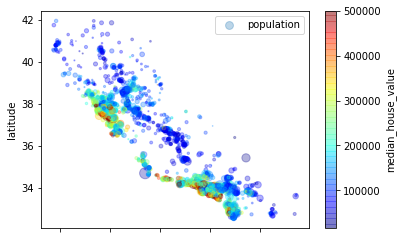

In [55]:
housing = X_train.copy()
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,
             s=housing['population']/100,
             label='population',
             c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True)
plt.legend()

In [76]:
#correlation
from pandas.plotting import scatter_matrix
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
#scatter_matrix(housing.iloc[:,1:3])
#plt.show()

median_house_value    1.000000
median_income         0.688028
total_rooms           0.134177
housing_median_age    0.105342
households            0.065904
total_bedrooms        0.049760
population           -0.024550
longitude            -0.045631
latitude             -0.144476
Name: median_house_value, dtype: float64

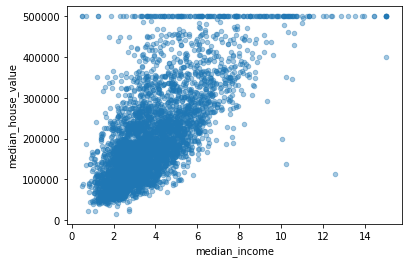

In [80]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.4)